In [1]:
# !pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 5\stock_price_data.csv')

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Mar-21,291.02,294.00,294.42,290.26,47.00M,-0.76%
1,30-Mar-21,293.25,294.86,295.72,291.50,38.81M,-0.02%
2,29-Mar-21,293.30,289.72,294.09,289.26,43.68M,0.71%
3,26-Mar-21,291.22,288.63,292.75,288.32,56.07M,1.59%
4,25-Mar-21,286.66,286.50,287.03,283.85,35.22M,0.30%


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      311 non-null    object 
 1   Price     311 non-null    float64
 2   Open      311 non-null    float64
 3   High      311 non-null    float64
 4   Low       311 non-null    float64
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.1+ KB


In [6]:
# change 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 17.1+ KB


In [8]:
# sort data by Date

data = data.sort_values(by='Date')

In [9]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
310,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.10%
309,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.43%
308,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
307,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.45%
306,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%


In [10]:
# drop columnns
data = data.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'])

In [11]:
def lineplot(x,y,data_,title_):
    sns.set(rc = {'figure.figsize':(15,8)})
    # Bigger than normal fonts
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x = x, y = y, data = data_)
    chart.set(title=title_)
    plt.show()

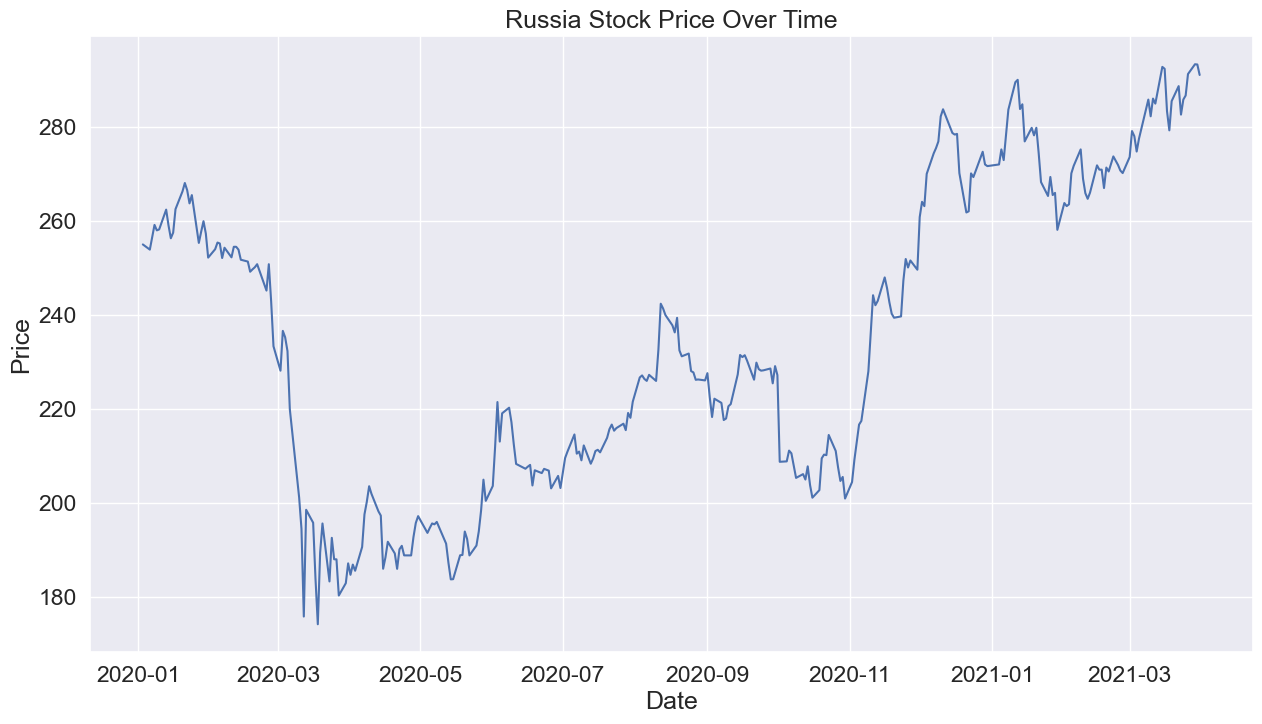

In [12]:
lineplot(x='Date',y='Price',data_=data,title_='Russia Stock Price Over Time')

In [13]:
# Prepare data for Prophet

df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Date'])
df['y'] = data['Price']
df.head()

,ds,y
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


In [14]:
# **create train_data**
df_train = df[df.ds <= '2020-12-31' ]

df_train.head()

,ds,y
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


In [15]:
# **create test_data**
df_test = df[df.ds > '2020-12-31' ]

df_test.head()

,ds,y
60,2021-01-04,272.00
59,2021-01-05,275.20
58,2021-01-06,272.93
57,2021-01-08,283.64
56,2021-01-11,289.49


In [16]:
model = Prophet()
model.fit(df)

09:55:33 - cmdstanpy - INFO - Chain [1] start processing
09:55:33 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Create a dataframe for the first quarter of 2021 with business days only
future_dates = pd.bdate_range(start='2021-01-01', end='2021-03-31')
future = pd.DataFrame({'ds': future_dates})

In [18]:
# Make a forecast
forecast = model.predict(future)

In [19]:
forecast.shape

(64, 16)

In [20]:
forecast_copy = forecast.copy()

In [21]:
forecast_copy = forecast_copy[['ds', 'yhat']]

In [22]:
# Add a column to indicate the source of the data
df_train['source'] = 'Training Data'
forecast['source'] = 'Forecast'
df_test['source'] = 'Actual Test Data'


C:\Users\dgarb\AppData\Local\Temp\ipykernel_21104\2982405717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['source'] = 'Training Data'
C:\Users\dgarb\AppData\Local\Temp\ipykernel_21104\2982405717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['source'] = 'Actual Test Data'


In [23]:
# Select relevant columns from forecast
forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': 'y'})
forecast.head()

,ds,y
0,2021-01-01,268.955258
1,2021-01-04,269.905739
2,2021-01-05,271.459526
3,2021-01-06,271.767953
4,2021-01-07,270.502362


In [24]:
# Add a column to indicate the source of the data
df_train['source'] = 'Training Data'
forecast['source'] = 'Forecast'
df_test['source'] = 'Actual Test Data'


C:\Users\dgarb\AppData\Local\Temp\ipykernel_21104\2982405717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['source'] = 'Training Data'
C:\Users\dgarb\AppData\Local\Temp\ipykernel_21104\2982405717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['source'] = 'Actual Test Data'


In [25]:
forecast.shape

(64, 3)

In [26]:
forecast.head()

,ds,y,source
0,2021-01-01,268.955258,Forecast
1,2021-01-04,269.905739,Forecast
2,2021-01-05,271.459526,Forecast
3,2021-01-06,271.767953,Forecast
4,2021-01-07,270.502362,Forecast


In [27]:
df_test.shape

(61, 3)

In [28]:
df_test.head()

,ds,y,source
60,2021-01-04,272.00,Actual Test Data
59,2021-01-05,275.20,Actual Test Data
58,2021-01-06,272.93,Actual Test Data
57,2021-01-08,283.64,Actual Test Data
56,2021-01-11,289.49,Actual Test Data


In [29]:
# Concatenate all data
combined_data = pd.concat([df_train, forecast, df_test], ignore_index=True)

In [30]:
combined_data.head()

,ds,y,source
0,2020-01-03,255.00,Training Data
1,2020-01-06,253.90,Training Data
2,2020-01-08,259.15,Training Data
3,2020-01-09,257.99,Training Data
4,2020-01-10,258.19,Training Data


In [31]:
combined_data.groupby('source').count()

,ds,y
source,,
Actual Test Data,61,61
Forecast,64,64
Training Data,250,250


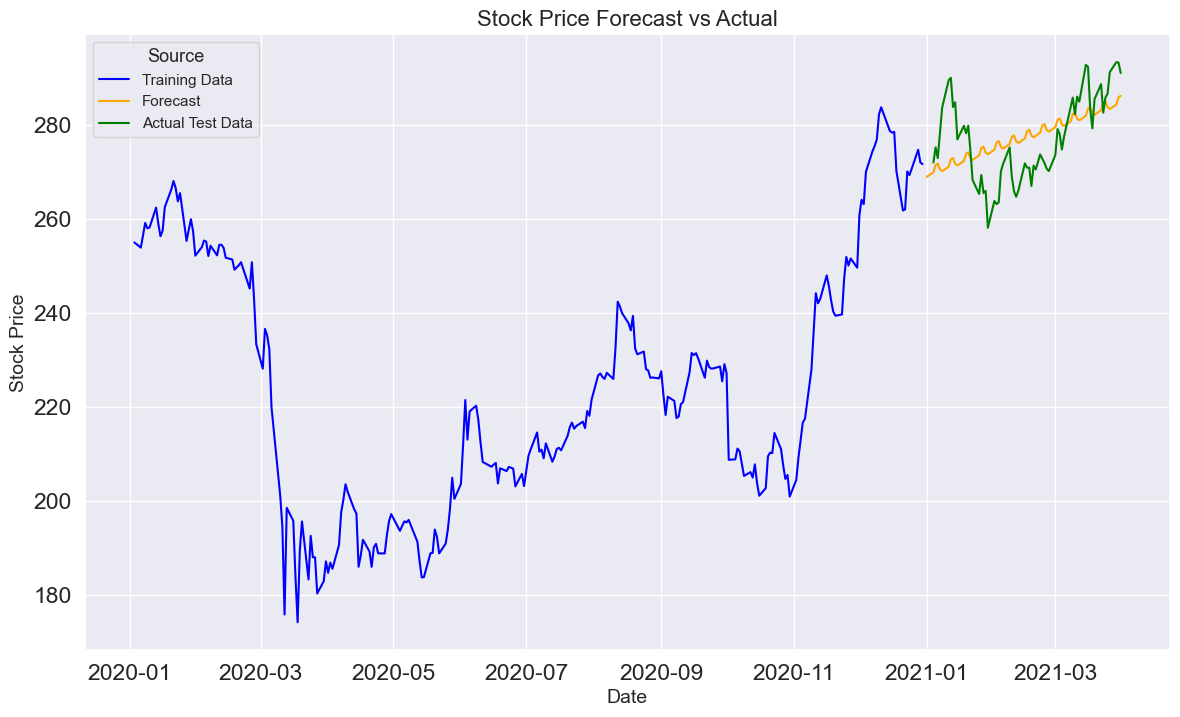

In [32]:
# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_data, x='ds', y='y', hue='source', palette=['blue', 'orange', 'green'])

# Add titles and labels
plt.title('Stock Price Forecast vs Actual', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(title='Source', title_fontsize='13', fontsize='11')

# Show plot
plt.show()

In [33]:

# Merge the forecast with the test data on the 'ds' column
# Note merge function in pandas performs an inner join by default. 
comparison =  df_test[['ds','y']].merge(forecast_copy, on='ds',how='inner')
comparison.shape                          

(60, 3)

In [34]:
print(len(comparison.y))
print(len(comparison.yhat))

60
60


In [35]:
comparison.head()

,ds,y,yhat
0,2021-01-04,272.00,269.905739
1,2021-01-05,275.20,271.459526
2,2021-01-06,272.93,271.767953
3,2021-01-08,283.64,270.154292
4,2021-01-11,289.49,271.104773


In [36]:
def calculate_mape(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [37]:
calculate_mape(comparison.y, comparison.yhat)

2.483905555809291